# Import Libraries

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [44]:
def relationship(df):
    crimes = df[["Crm Cd Desc", "TIME OCC"]]
    t = crimes["TIME OCC"].value_counts()

    by = 100 ## Divides time into "by" sub sections
    deg = 5

    crm = {}
    for i, j in enumerate(t.index.to_list()):
        if j // by not in crm and j not in (0, 1200):
            crm[j // by] = t.values[i]
        elif j not in (0, 1200):
            crm[j // by] += t.values[i]

    crm.pop(0, None)
    crm.pop(12, None)

    crime, count = zip(*[(k, v) for k, v in crm.items()])

    mymodel = np.poly1d(np.polyfit(crime, count, deg))

    myline = np.linspace(0, 2400 / by, 100)

    plt.xlabel(f'Time (0h - 2400h)/{by}')
    plt.ylabel('Crime Counts')
    plt.title("Crime Counts per Time of Day")

    plt.scatter(crime, count)
    plt.plot(myline, mymodel(myline), color="red", linewidth=0.5)
    print(f'R2 = {r2_score(count, mymodel(crime))}')

    crime = sm.add_constant(crime)
    polynomial_features = PolynomialFeatures(degree=deg)
    xp = polynomial_features.fit_transform(crime)

    result = sm.OLS(count, xp).fit()

    print(result.summary())

# Execute Function

R2 = 0.9727726181645943
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     114.3
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           6.16e-12
Time:                        14:19:53   Log-Likelihood:                -189.52
No. Observations:                  22   AIC:                             391.0
Df Residuals:                      16   BIC:                             397.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5331.2643    503

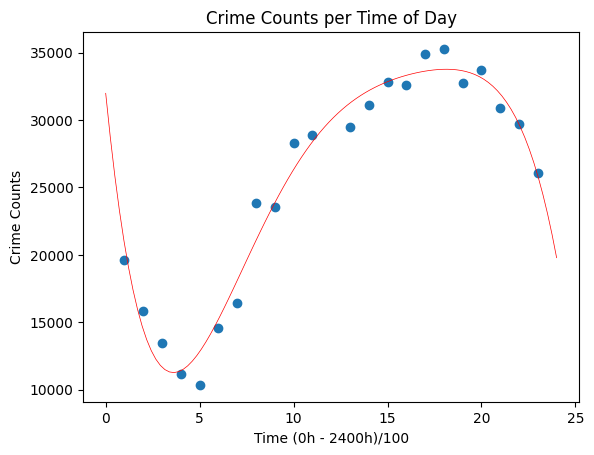

In [45]:
if __name__ == "__main__":
    df = pd.read_csv("Data/RefinedFile.csv", na_values='-', index_col=0)
    relationship(df)